# Introduction

In this notebook, we’ll explore how ensemble methods, particularly Random Forest, can improve feature selection in comparison to a single Decision Tree. We’ll use the Breast Cancer dataset from sklearn, train both models, analyze their feature importances, and compare results.

## Step 1: Import Libraries

I'll start by importing the necessary Python Libraries for data manipulation as well as modeling, and visualization.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


## Step 2: Load and Explore the Dataset
I will use the Breast Cancer dataset which contains numerical features related to cell nuclei in digitized images of breast mass samples.

In [3]:
data = load_breast_cancer()
X, y = data.data, data.target
print("Feature names:", data.feature_names)
print("Target labels:", data.target_names)
print("Dataset shape:", X.shape)
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])


Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target labels: ['malignant' 'benign']
Dataset shape: (569, 30)
Number of samples: 569
Number of features: 30


## Step 3: Split the Data
I will split the dataset into a training set of 70% and a testing set of 30%

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Train set shape:", X_train.shape)

Train set shape: (398, 30)


## Step 4: Train a Random Forest Classifier
I will build a Random Forest model using 100 decision trees.

In [5]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_accuracy = rf_clf.score(X_test, y_test)
print("Random Forest accuracy:", rf_accuracy)

Random Forest accuracy: 0.9707602339181286


## Step 5: Feature Importance
Here, with the Random Forest, I will extract and visualize the feature importance.

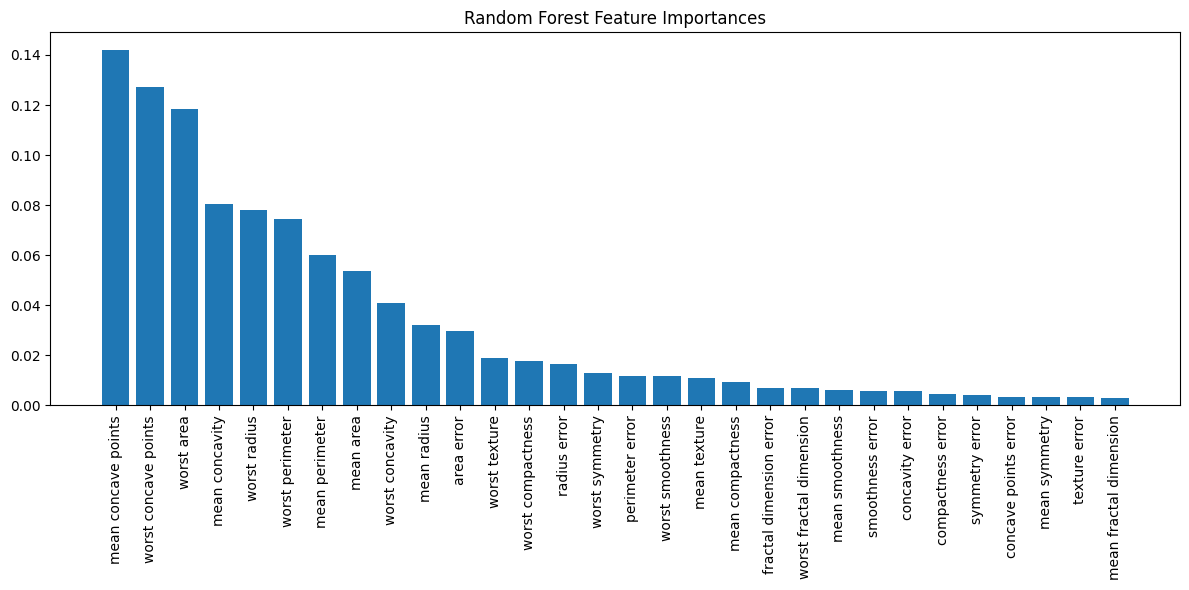

In [6]:
rf_importances = rf_clf.feature_importances_
rf_indices = np.argsort(rf_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Random Forest Feature Importances')
plt.bar(range(X_train.shape[1]), rf_importances[rf_indices], align='center')
plt.xticks(range(X_train.shape[1]), data.feature_names[rf_indices], rotation=90)
plt.tight_layout()
plt.show()


## Step 6: Train a Single Decision Tree
Now I can build a single Decision Tree classifier on the same data for comparison.


In [7]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
tree_accuracy = tree_clf.score(X_test, y_test)
print("Decision Tree accuracy:", tree_accuracy)

Decision Tree accuracy: 0.9415204678362573


## Step 7: Feature Importance - Decision Tree
Now I will extract and visualize the feature importances from the single Decision Tree Model

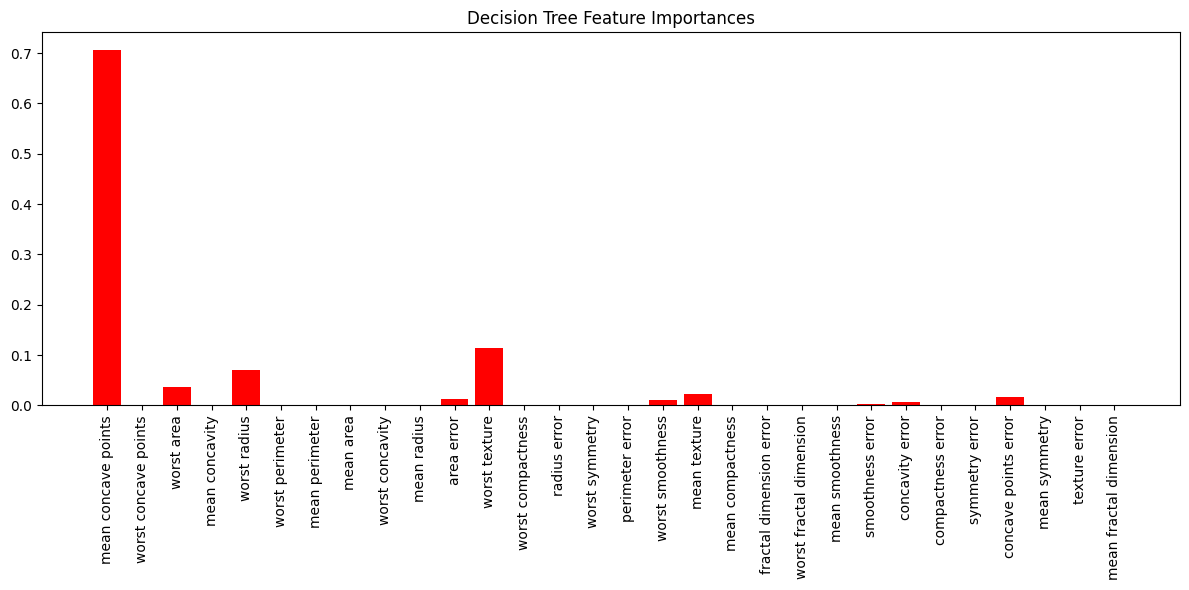

In [8]:
tree_importances = tree_clf.feature_importances_

plt.figure(figsize=(12, 6))
plt.title('Decision Tree Feature Importances')
plt.bar(range(X_train.shape[1]), tree_importances[rf_indices], color='r', align='center')
plt.xticks(range(X_train.shape[1]), data.feature_names[rf_indices], rotation=90)
plt.tight_layout()
plt.show()

